   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float

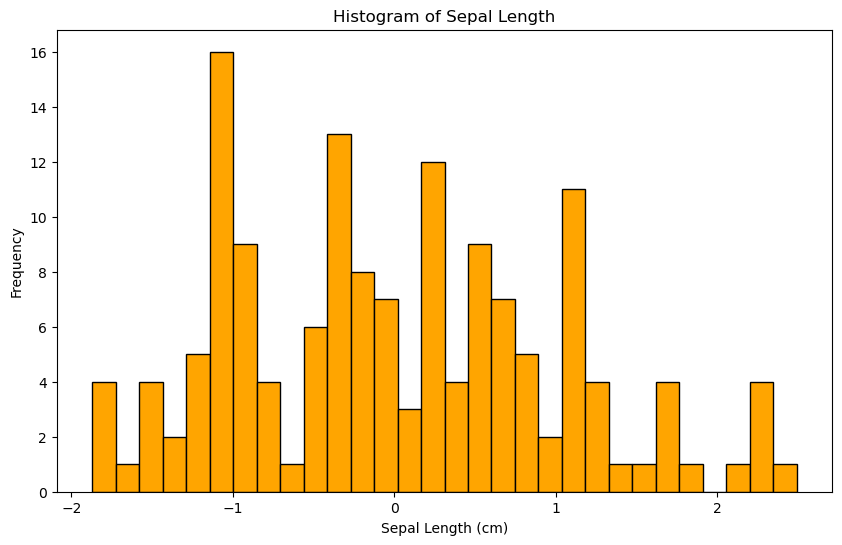

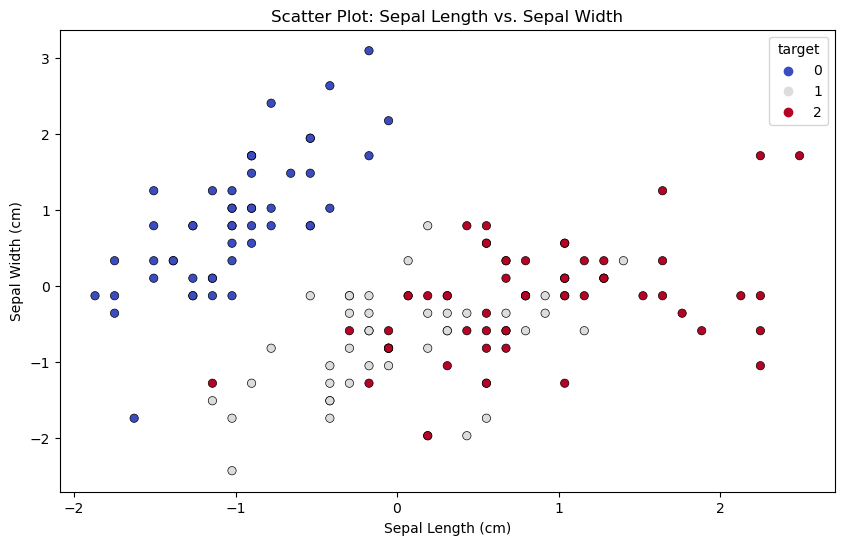

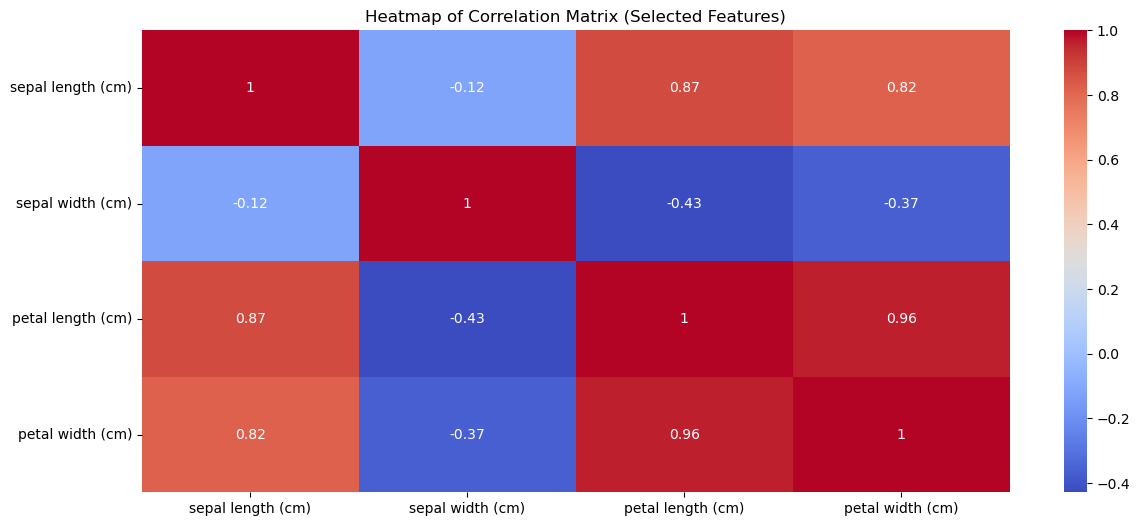

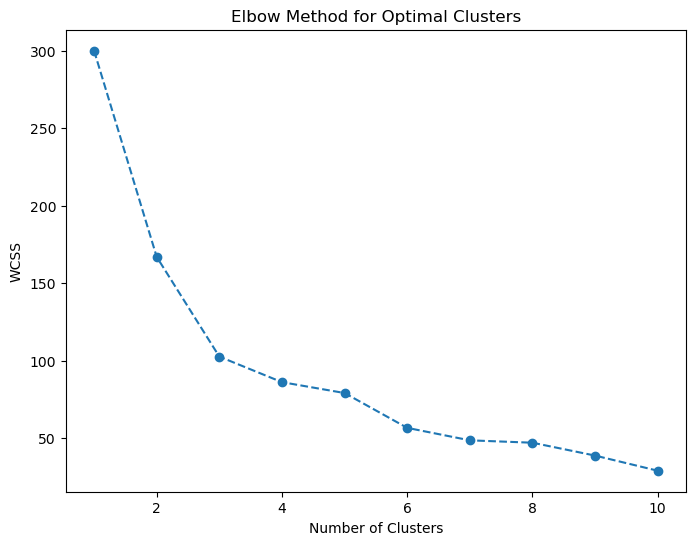

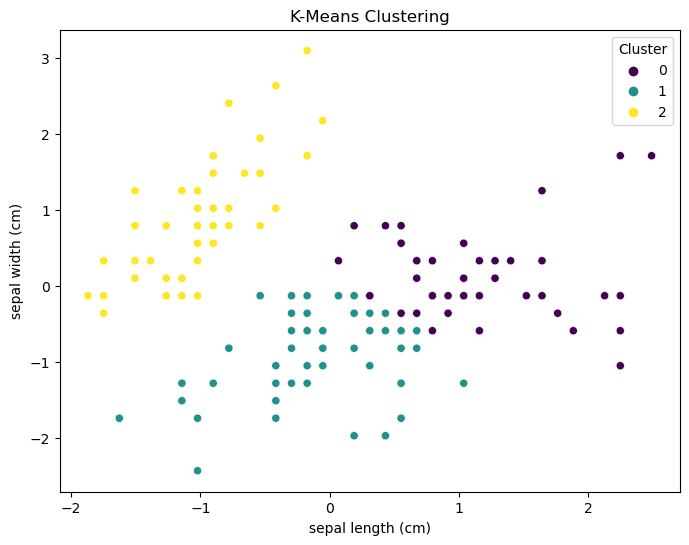

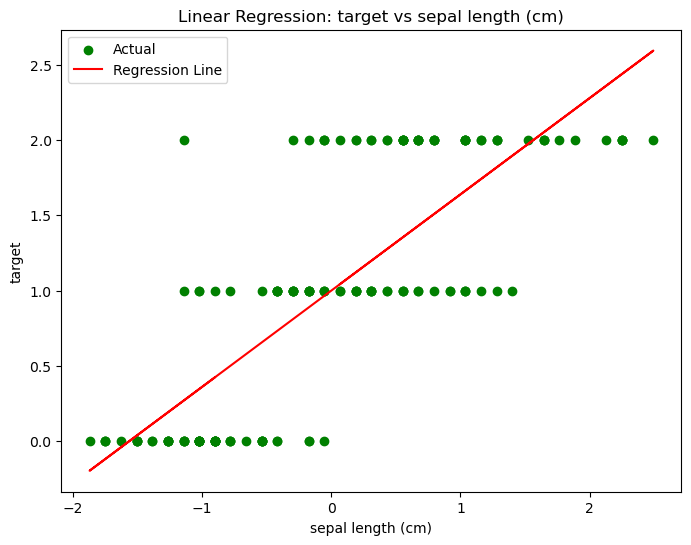

Coefficients: [0.63895857]
Intercept: 1.0000000000000009
Mean Squared Error: 0.25839861231192535
R² Score: 0.6124020815321121


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset
print(df.info())

# Handle missing values (if any) using imputation
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Standardize features for clustering and regression
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# 1. Histogram of Sepal Length
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['sepal length (cm)'], bins=30, color='orange', edgecolor='k')
    plt.title('Histogram of Sepal Length')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Frequency')
    plt.savefig('histogram_sepal_length.png')
    plt.show()
    plt.close()

# 2. Scatter Plot of Sepal Length vs Sepal Width
def plot_scatter(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='target', palette='coolwarm', edgecolor='k')
    plt.title('Scatter Plot: Sepal Length vs. Sepal Width')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.savefig('scatter_sepal_length_vs_sepal_width.png')
    plt.show()
    plt.close()

# 3. Heatmap of Correlation Matrix
def plot_heatmap(df):
    plt.figure(figsize=(14, 6))
    columns_to_use = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    correlation_matrix = df[columns_to_use].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix (Selected Features)')
    plt.savefig('heatmap_correlation_matrix.png')
    plt.show()
    plt.close()

# 4. K-Means Clustering
def kmeans_clustering(df, features, n_clusters=3):
    X = df[features]

    # Elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=df, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# 5. Linear Regression
def linear_regression_fit(df, x_column, y_column):
    X = df[[x_column]]
    y = df[y_column]

    # Initialize the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='green', label='Actual')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'Linear Regression: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

    # Displaying model metrics
    print(f'Coefficients: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Mean Squared Error: {mean_squared_error(y, y_pred)}')
    print(f'R² Score: {r2_score(y, y_pred)}')

# Generate all plots
plot_histogram(df)
plot_scatter(df)
plot_heatmap(df)

# Example usage of clustering and regression
kmeans_clustering(df, ['sepal length (cm)', 'sepal width (cm)'])
linear_regression_fit(df, 'sepal length (cm)', 'target')

# Save the updated dataframe with clusters
df.to_csv('Iris_Data_with_Clusters.csv', index=False)


In [4]:
#Descriptive Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000,1.013333
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232,0.802569
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000,2.000000


In [5]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   
Cluster                    -0.851188          0.320120          -0.902495   

                   petal width (cm)    target   Cluster  
sepal length (cm)          0.817941  0.782561 -0.851188  
sepal width (cm)          -0.366126 -0.426658  0.320120  
petal length (cm)          0.962865  0.949035 -0.902495  
petal width (cm)           1.000000  0.956547 -0.884238  
target                     0.956547  1.000000 -0.826818  
Cluster                   -0.884238 -0.826818  1.000000  
